## Short visual check

### The purpose of this file

In this notebook, I check the sample files before processing them to design the final data frame on which the machine learning algorithm is going to be trained. There are many sources of error whilst carrying out the experiments and collecting the data. If we want to be sure that the machine learning algorithm works well, we need to train it on good quality data. I have an expectation about what form the different acceleration/angle-time graphs should be if the data has been collected properly, so I make a visual check on the data before creating the final dataset.
In this notebook I 
 - open and read the file from the folder;
 - process the file to create a proper pandas data frame;
 - convert the string data to numeric in the data frame;
 - plot the graphs from the data frame;
 - drop the data file if I find that the data is not in a good quality.

### Importing the important libraries

In [1]:
import pandas as pd
import os
import glob
from matplotlib import pyplot as plt

### Accessing files and getting the absolute paths to them

In [2]:
# accessing files

def get_files(filepath):
    all_files = []
    for root, dirs, files in os.walk(filepath):
        files = glob.glob(os.path.join(root, '*.txt'))
        for f in files:
            all_files.append(os.path.abspath(f))
            
        return all_files

In [3]:
# checking how the function works
data_files = get_files('Data')
print("The number of files is {}".format(len(data_files)+1))

The number of files is 219


### Creating data frame from the files

In [4]:
# processing file

def process_file(datafile):
    myfile = open(datafile, 'r')
    datalist = myfile.readlines()
    data_to_frame = []
    for item in datalist:
        item = item.split(sep = ',')
        data_to_frame.append(item)
            
    df = pd.DataFrame(data = data_to_frame, columns = ['a_x', 'a_y', 'angle'])
    return df
        
        

### Converting data in the frame to numeric

In [5]:
# The data sent by the Micro:bit had to be in str format, but for processing the data we need it in numeric format.

def to_numeric(df):
    df['a_x'] = pd.to_numeric(df['a_x'])
    df['a_y'] = pd.to_numeric(df['a_y'])
    df['angle'] = pd.to_numeric(df['angle'])
    
    return df
    

### Plotting the graphs

In [6]:
# finding the type of the motion added to the legened

def motion_type(df):
    if df['a_x'][0] == 0:
        type_ = 'SHM'
    elif df['a_x'][0] == 1:
        type_ = 'Pendulum'
    else: 
        type_ = 'Circular'
        
    return str(type_)

In [7]:
# plotting the graph

def plot_graph(df,type_, file_number, position):
    figure = plt.figure(figsize = (15, 10))
    ax = figure.add_axes([0,0,0.75, 0.75])
    
    graph_x = ax.plot(range(df.shape[0]), df['a_x'], 'r-')
    graph_y = ax.plot(range(df.shape[0]), df['a_y'], 'g-')
    graph_ang = ax.plot(range(df.shape[0]), df['angle'], 'b-')
    
    ax.set_xlabel('number of smaple')
    ax.set_ylabel('a_x/a_y/angle')
    ax.set_title('type: {}, file number: {}, position : {}'.format(type_, file_number, position))
    ax.legend(labels = ('a_x', 'a_y', 'angle'), loc = 'upper right')
    
    plt.show()

### Applying the functions above and dropping files if necessary

What was the latest file you have checked?100


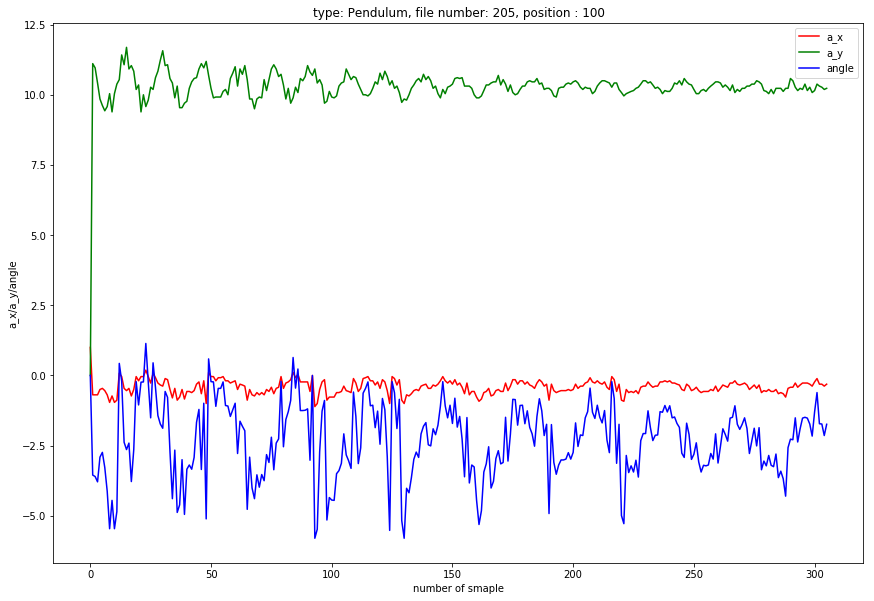

Are you happy with the graph? y/nn


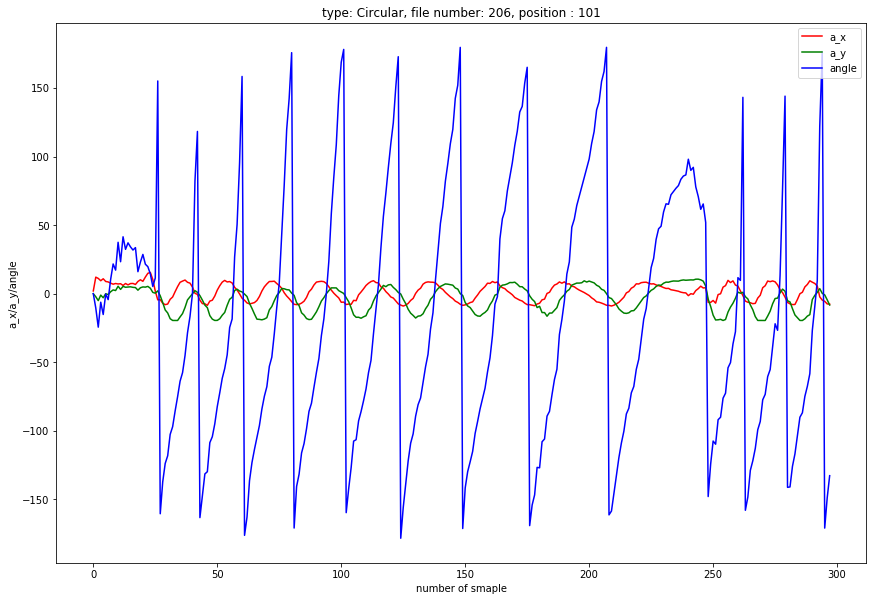

Are you happy with the graph? y/ny


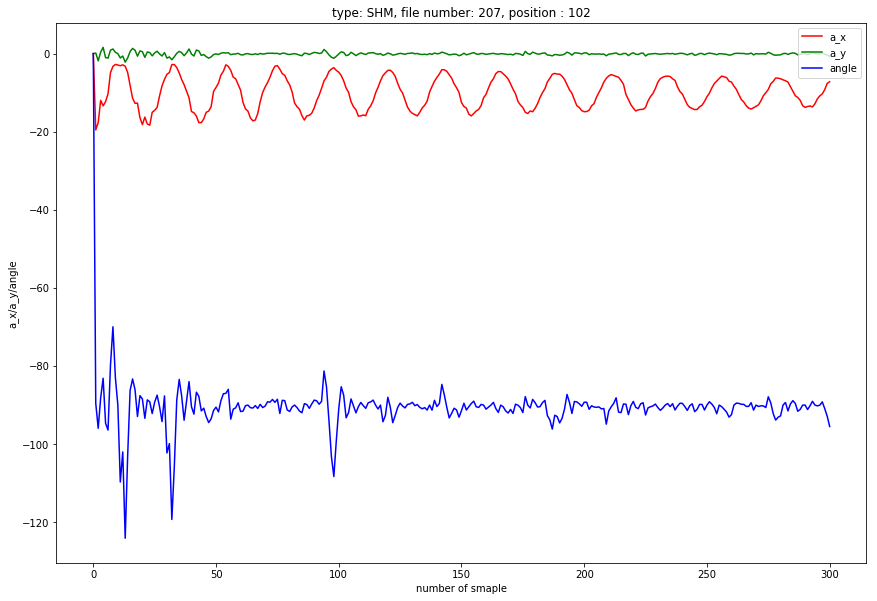

Are you happy with the graph? y/ny


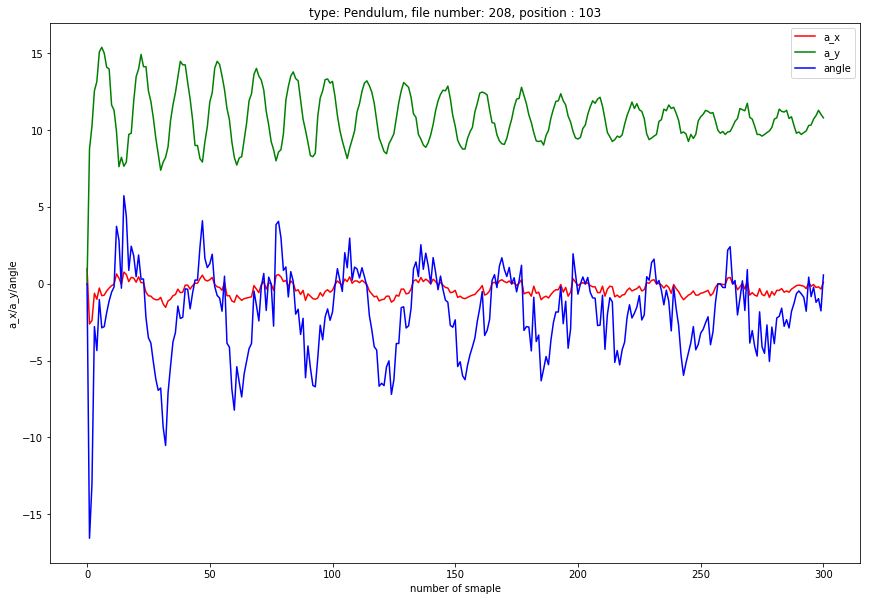

Are you happy with the graph? y/ny


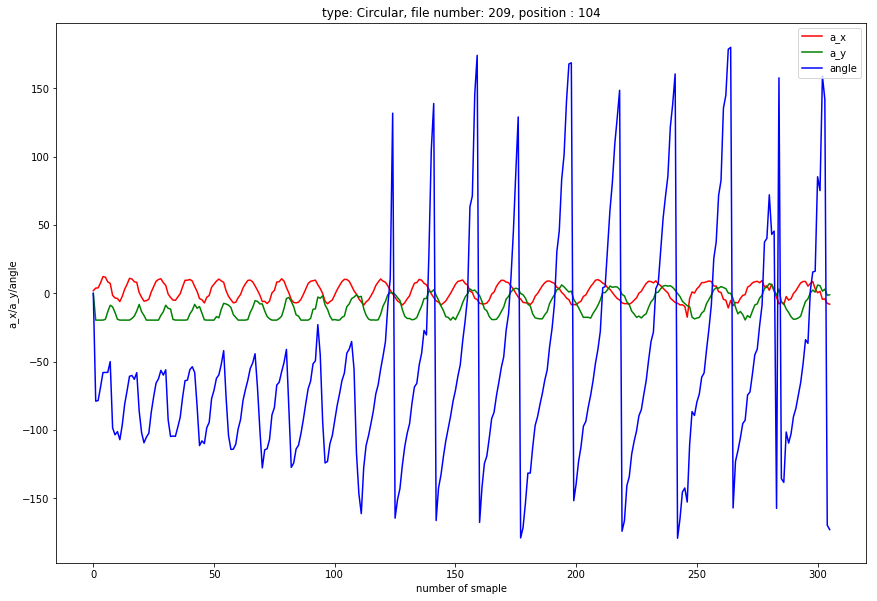

Are you happy with the graph? y/ny


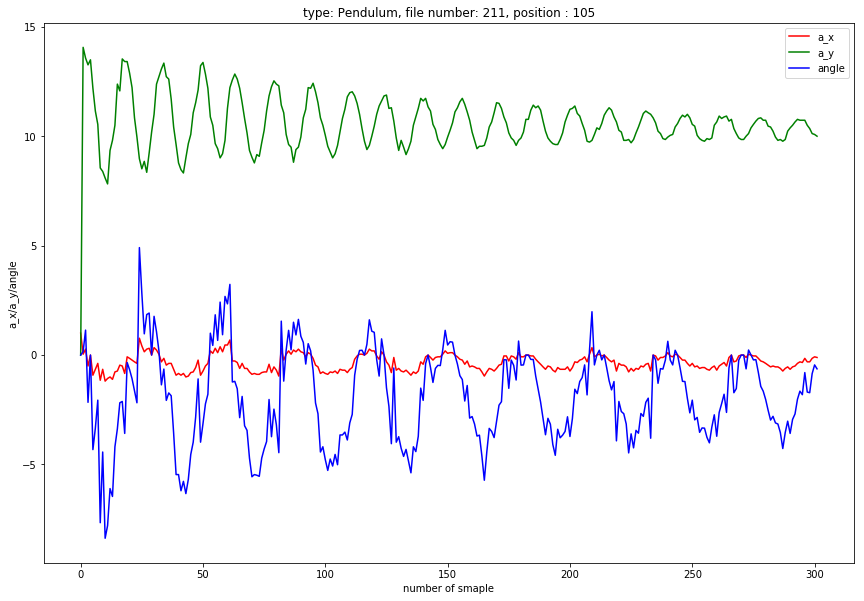

Are you happy with the graph? y/ny


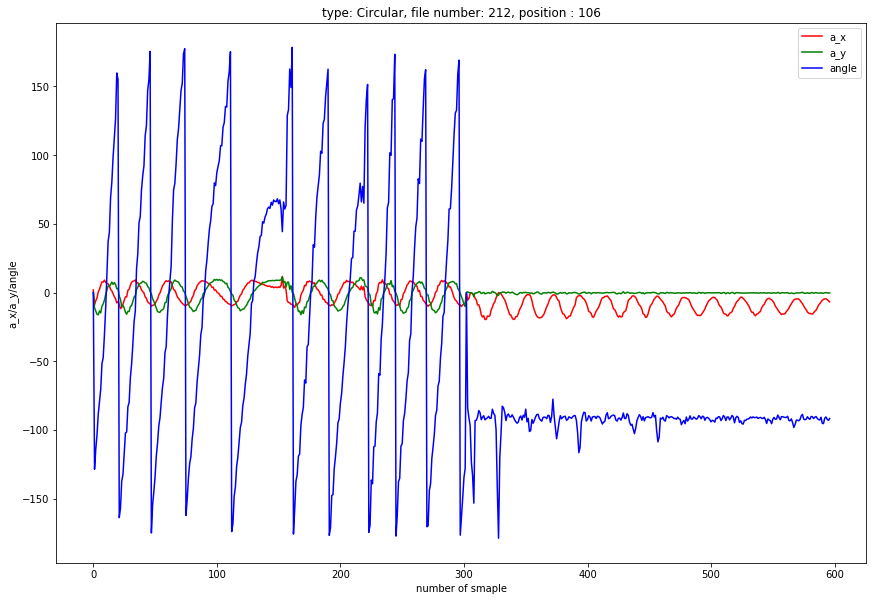

Are you happy with the graph? y/ny


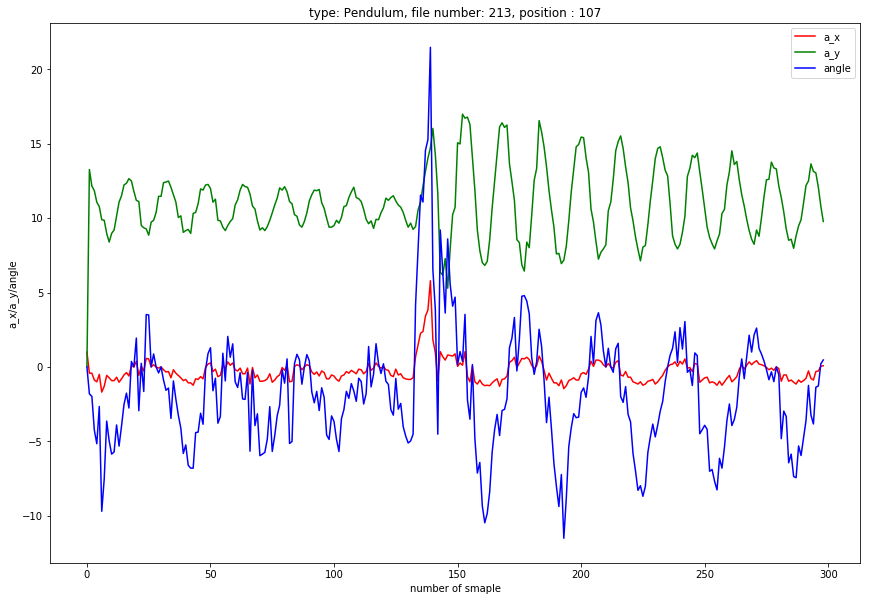

Are you happy with the graph? y/ny


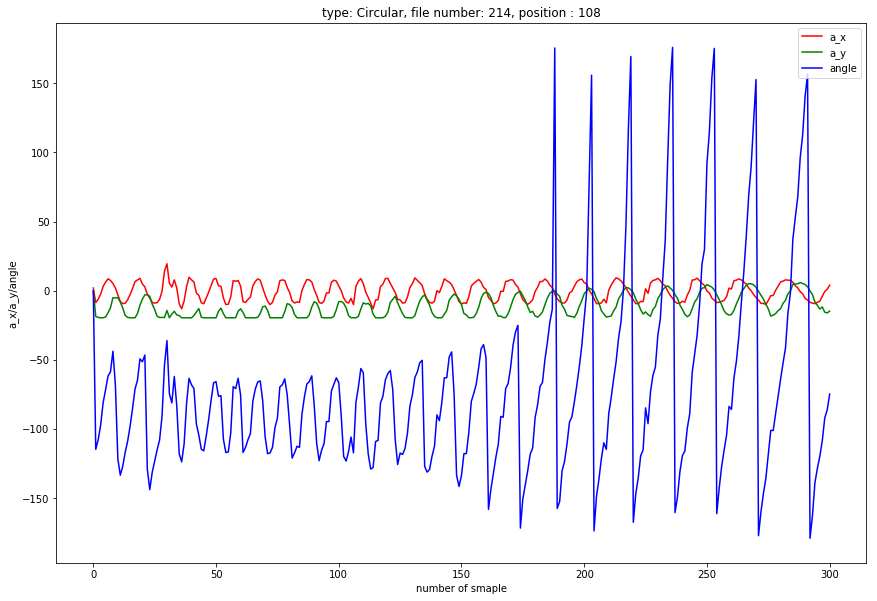

Are you happy with the graph? y/nn


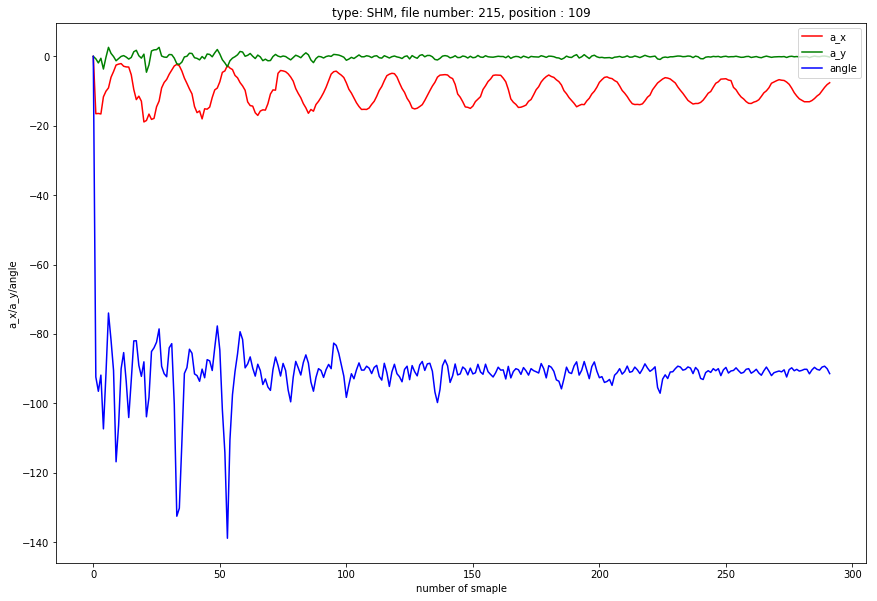

Are you happy with the graph? y/ny


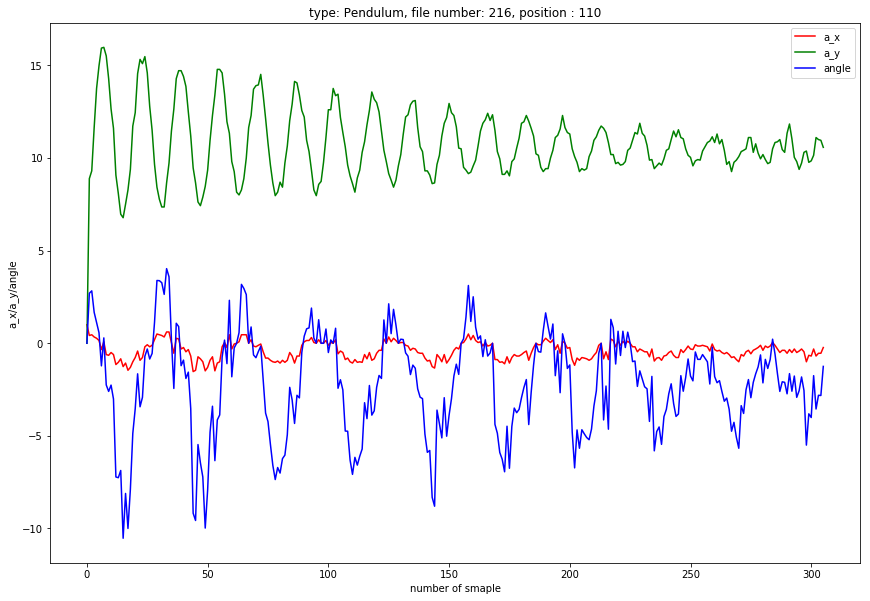

Are you happy with the graph? y/ny


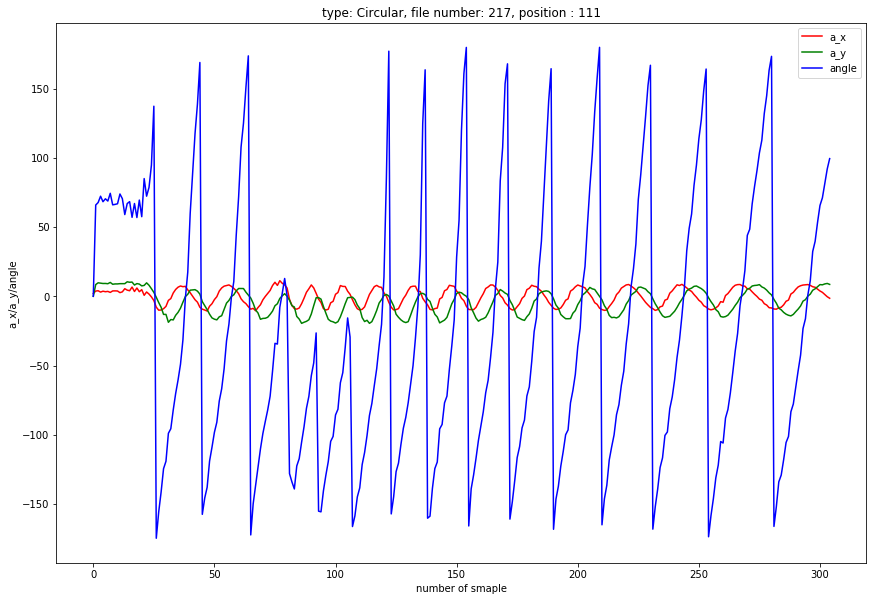

Are you happy with the graph? y/ny


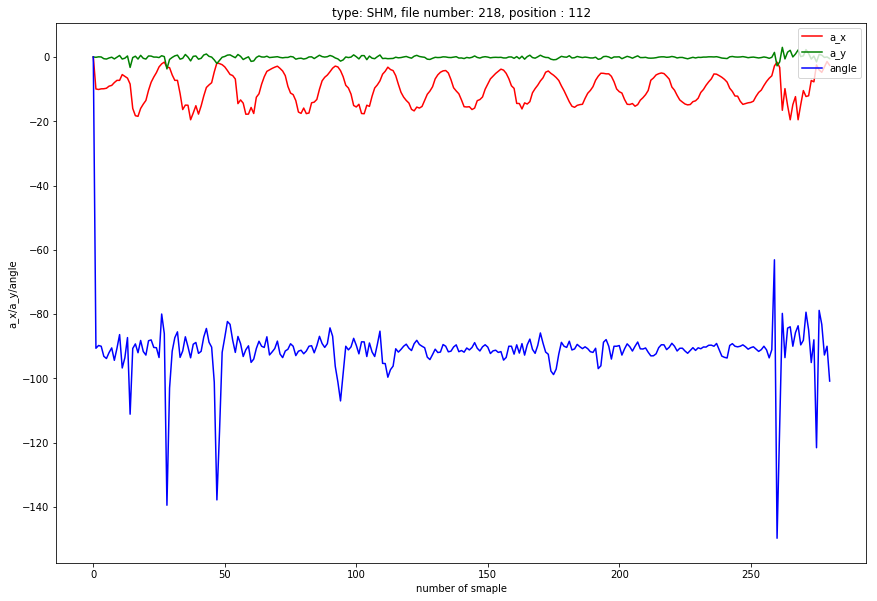

Are you happy with the graph? y/ny


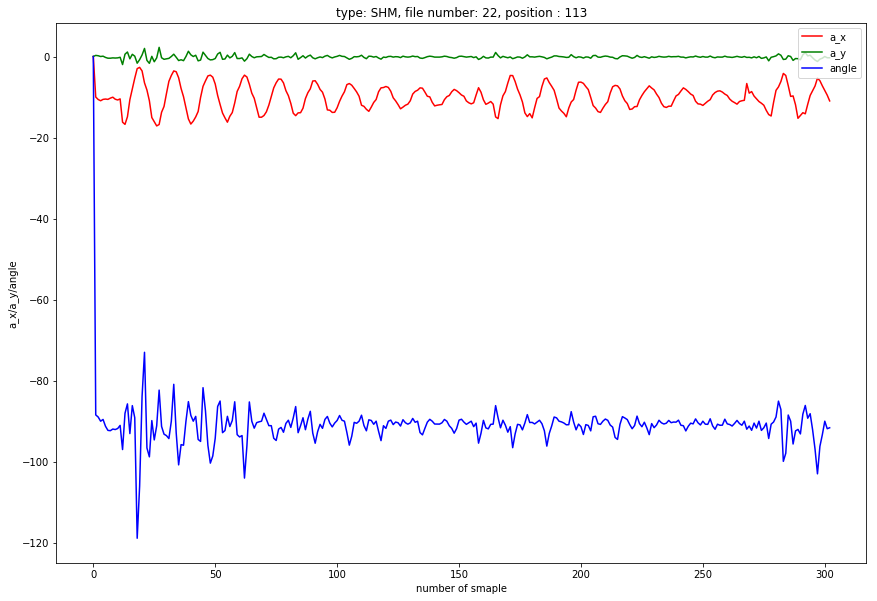

Are you happy with the graph? y/ny


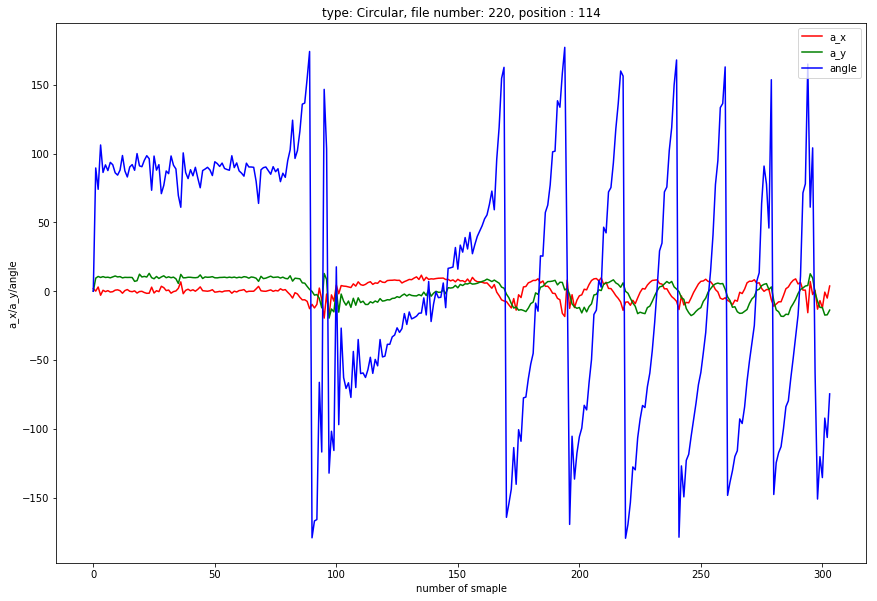

Are you happy with the graph? y/nn


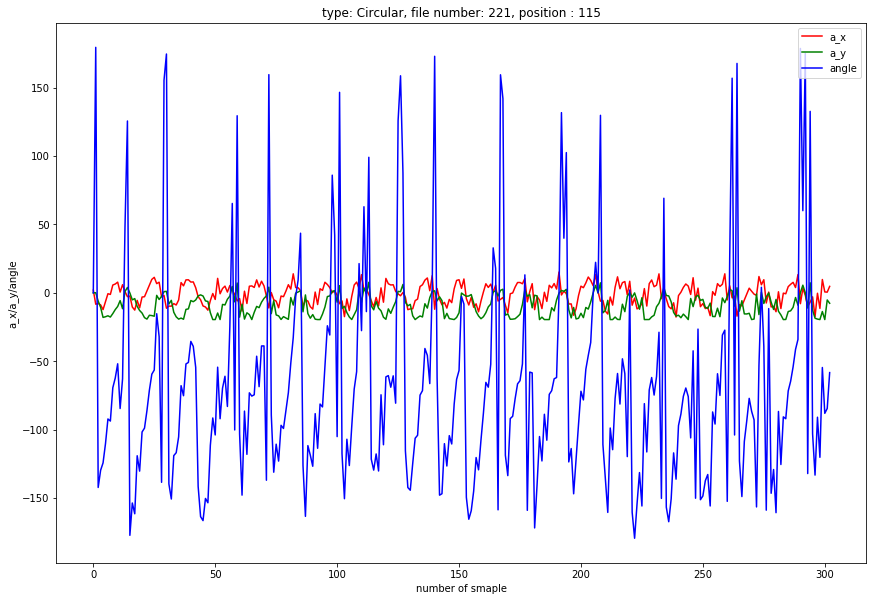

Are you happy with the graph? y/ny


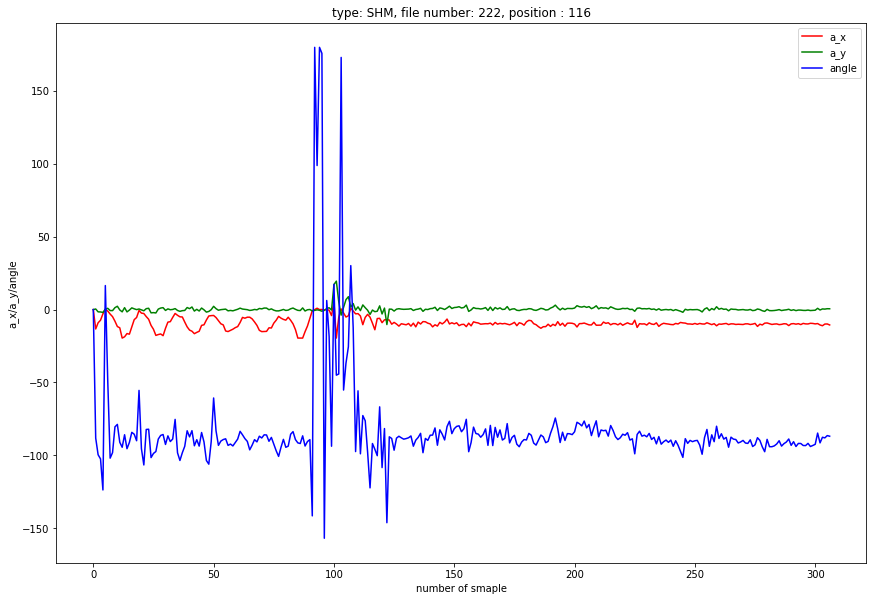

Are you happy with the graph? y/nn


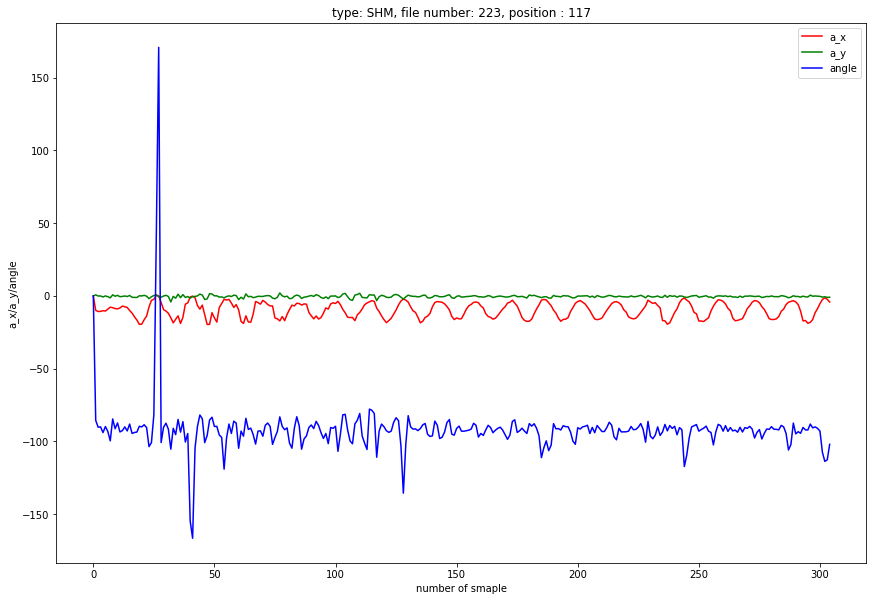

Are you happy with the graph? y/ny


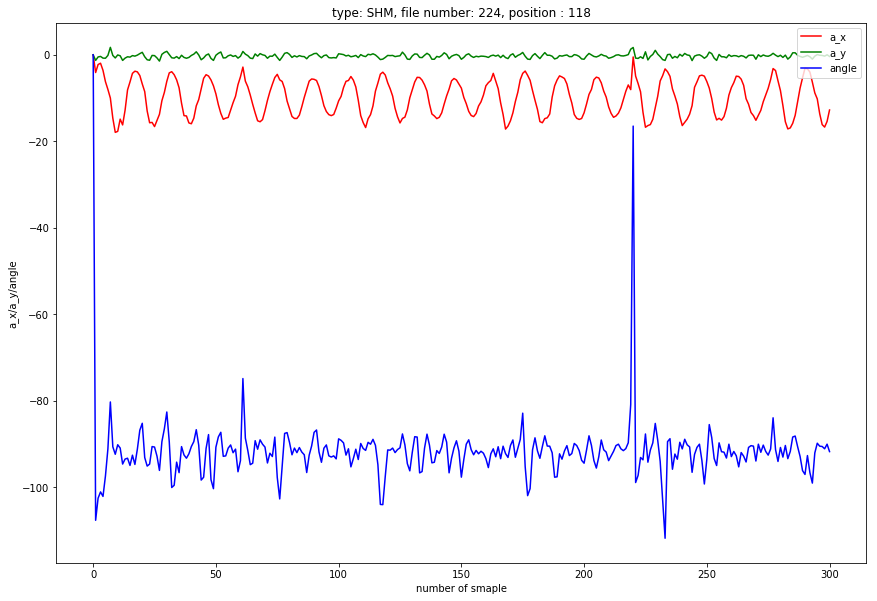

Are you happy with the graph? y/ny


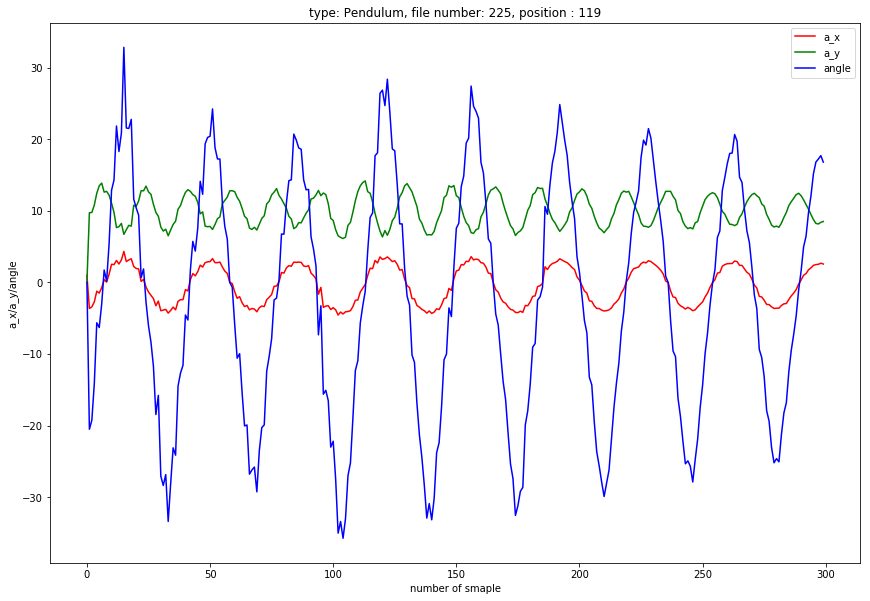

Are you happy with the graph? y/ny


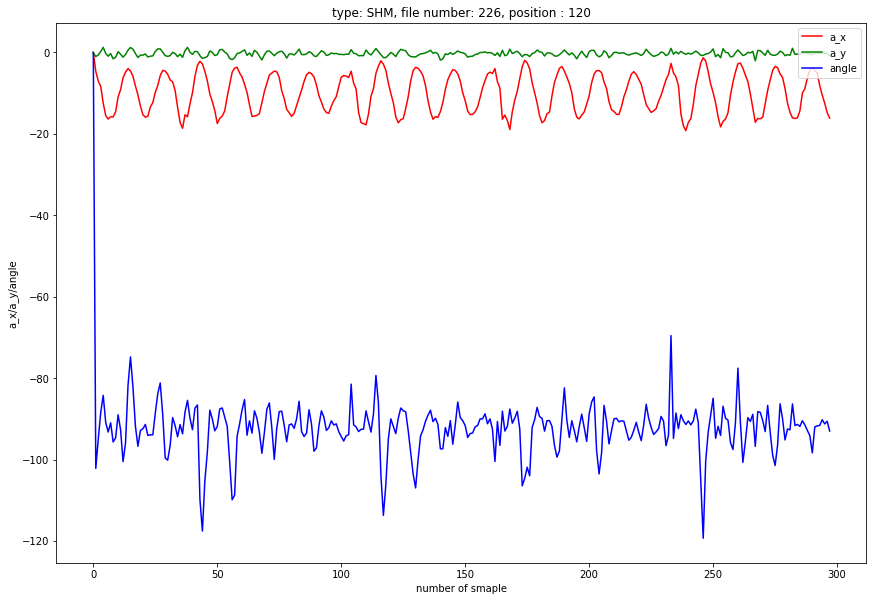

Are you happy with the graph? y/ny


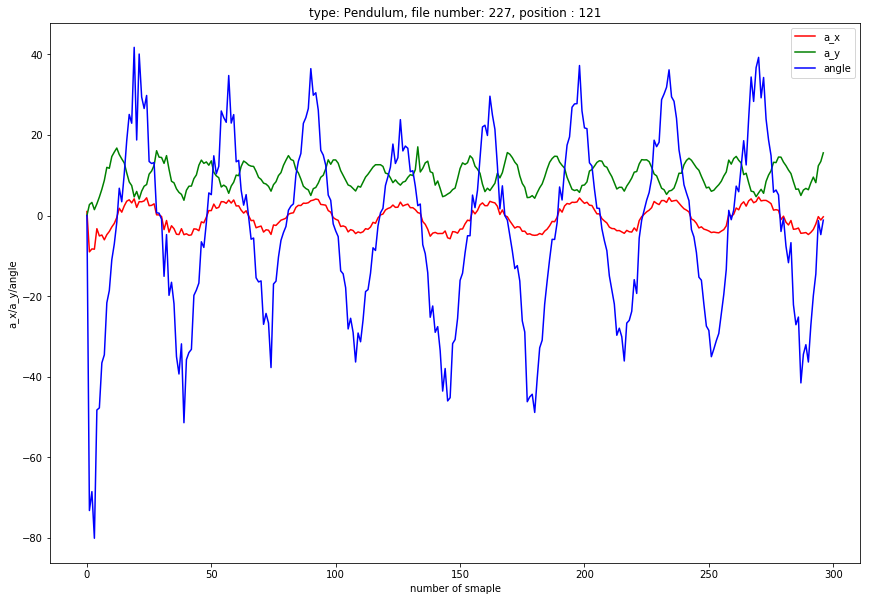

Are you happy with the graph? y/ny


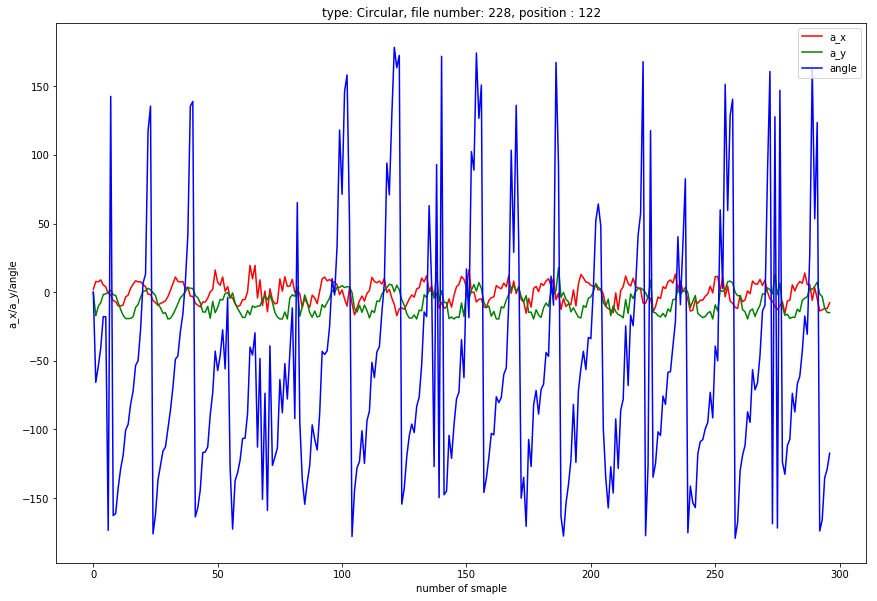

Are you happy with the graph? y/ny


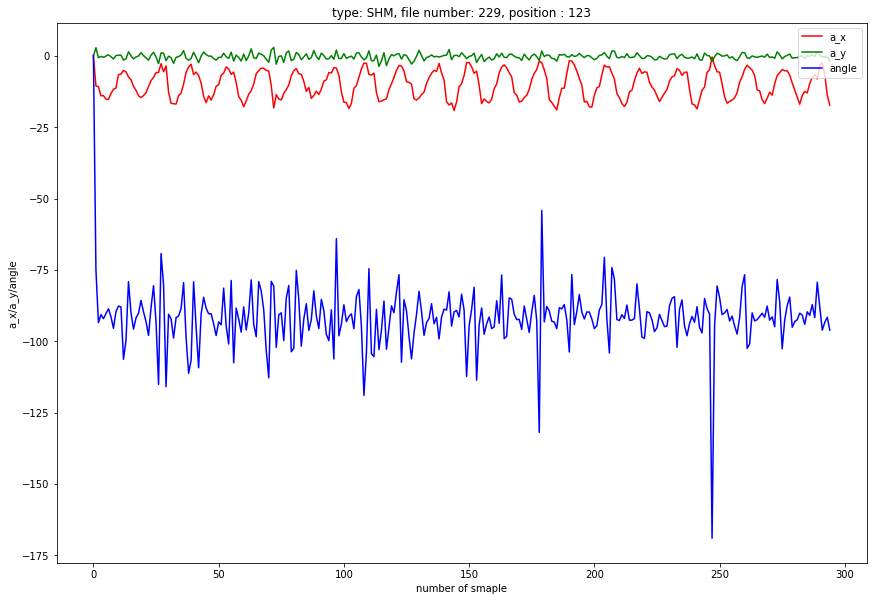

Are you happy with the graph? y/ny


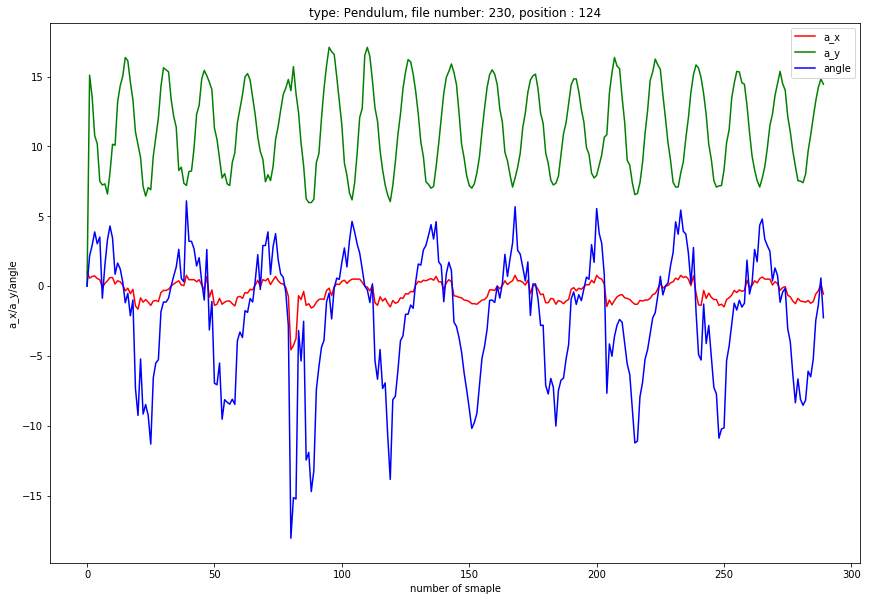

Are you happy with the graph? y/nn


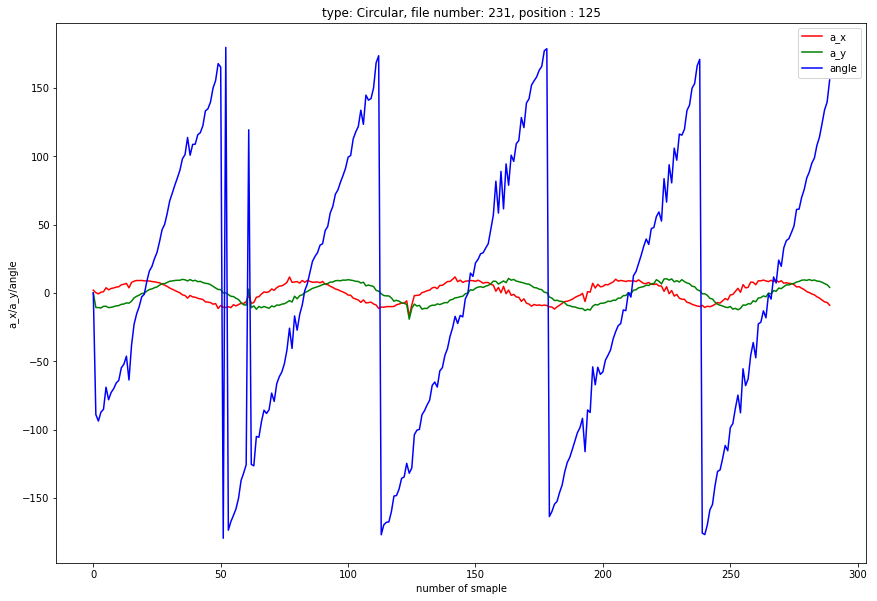

Are you happy with the graph? y/ny


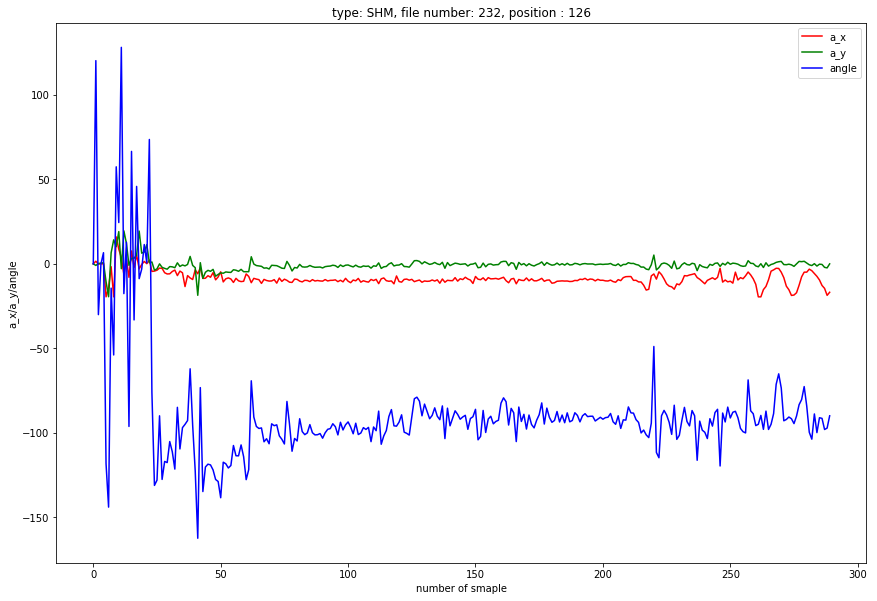

Are you happy with the graph? y/ny


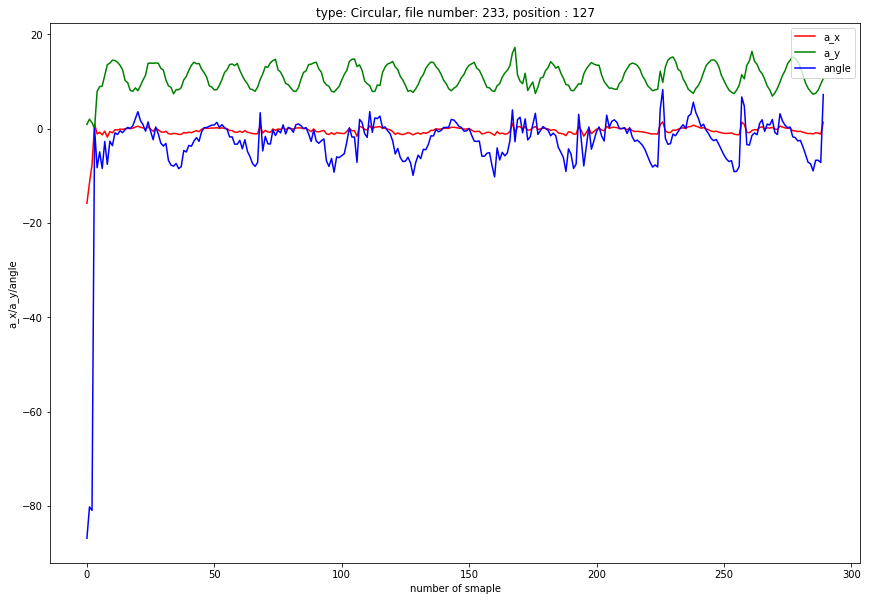

Are you happy with the graph? y/ny


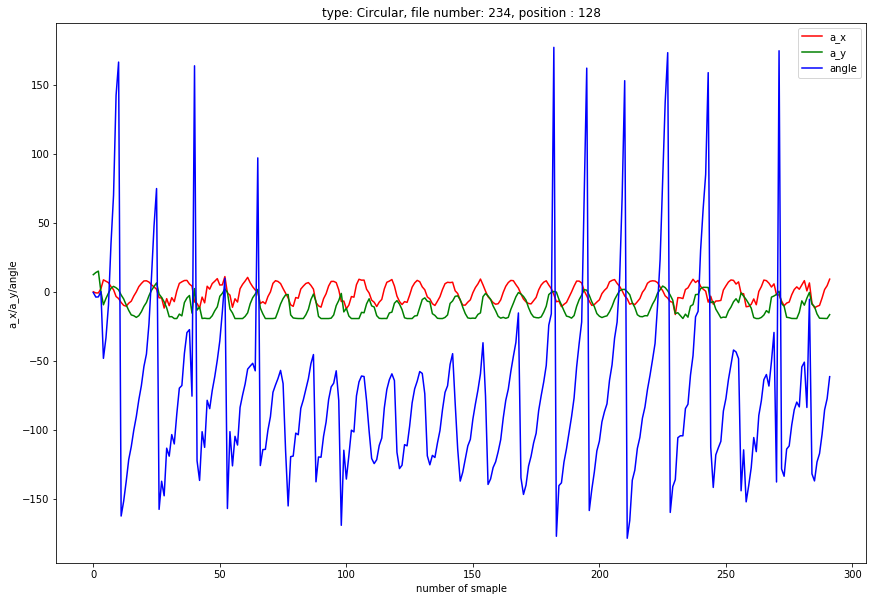

Are you happy with the graph? y/nn


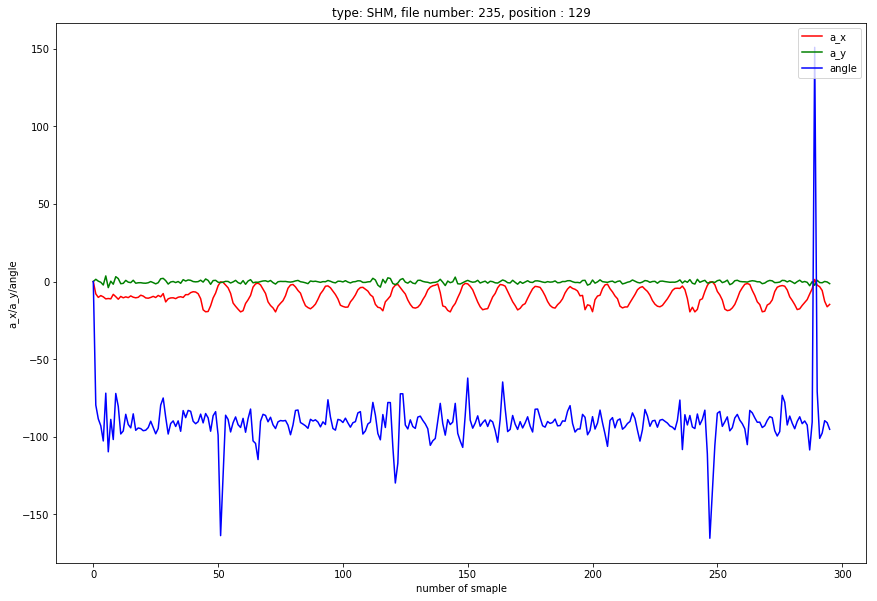

Are you happy with the graph? y/ny


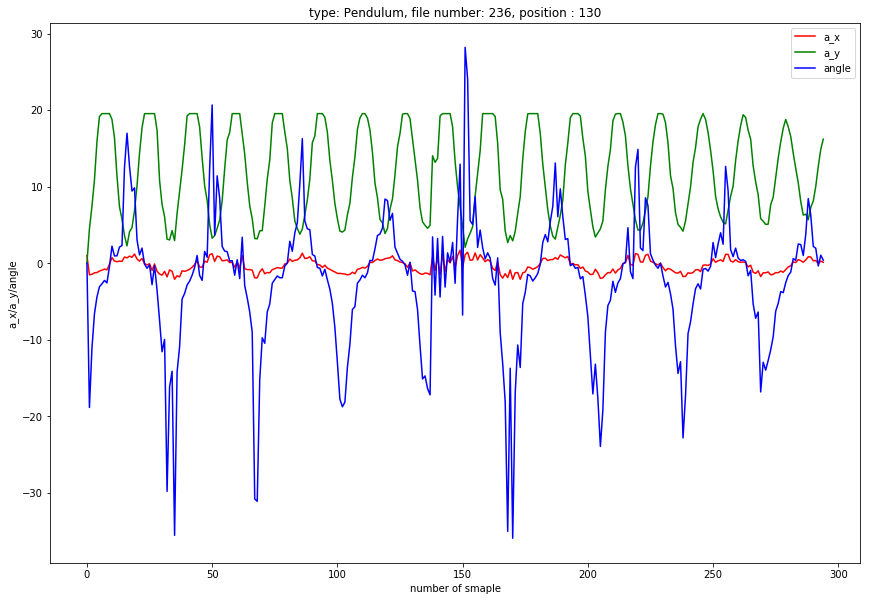

Are you happy with the graph? y/nn


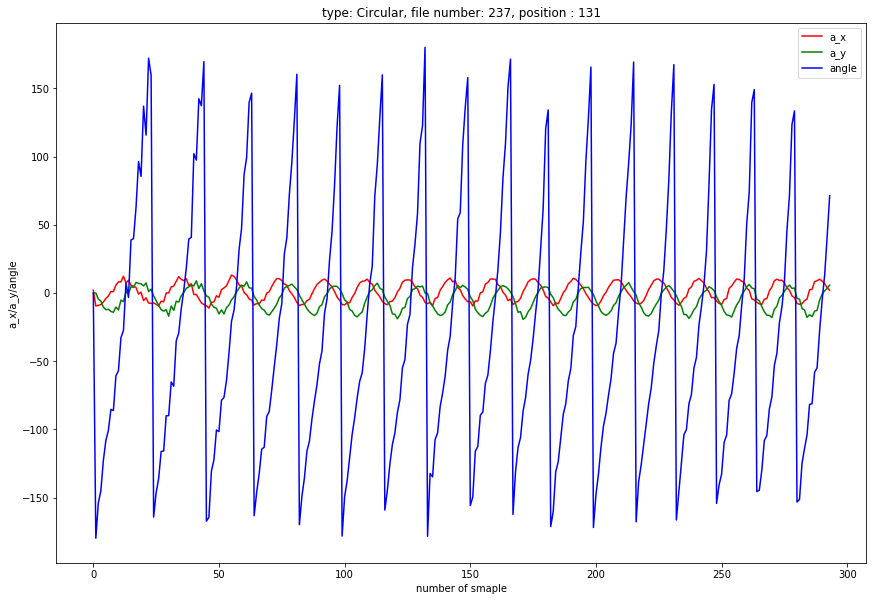

Are you happy with the graph? y/ny


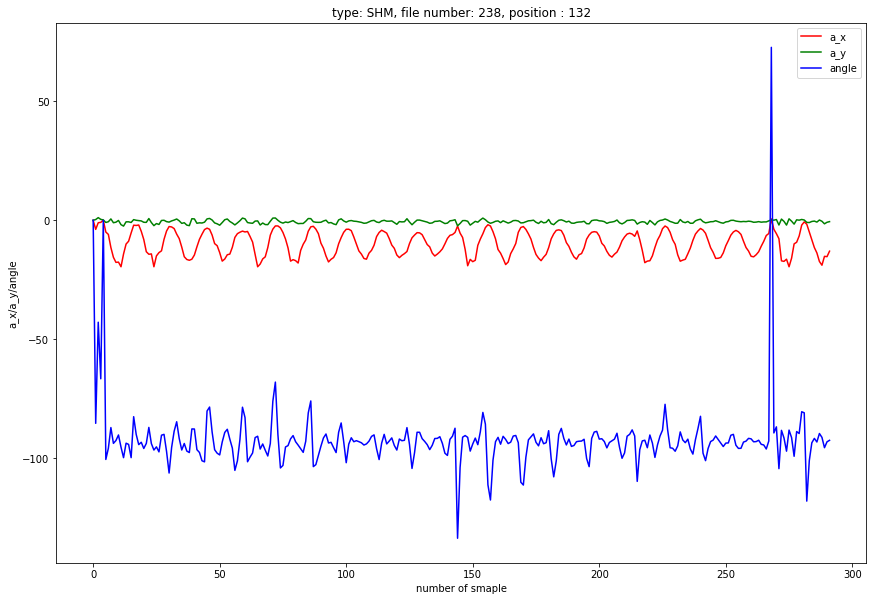

Are you happy with the graph? y/ny


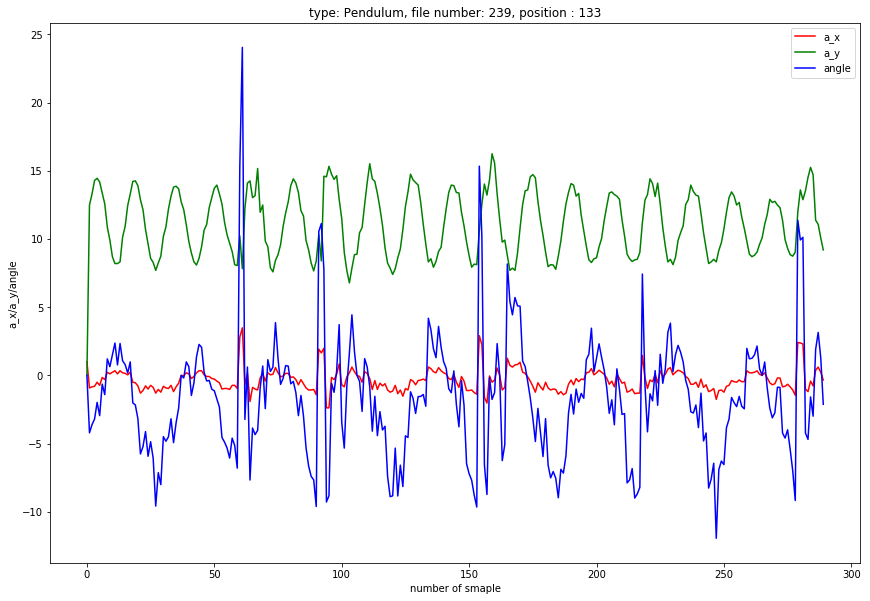

Are you happy with the graph? y/nn


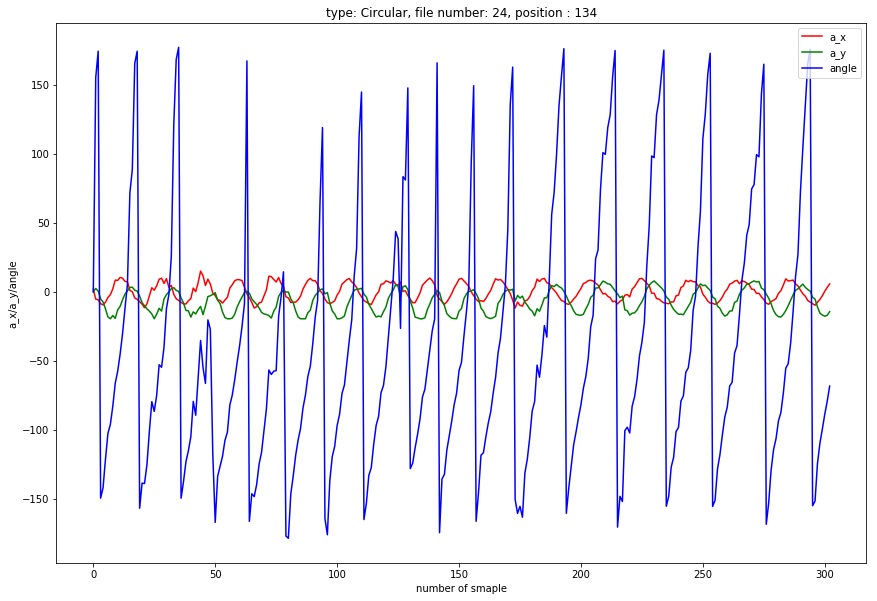

Are you happy with the graph? y/ny


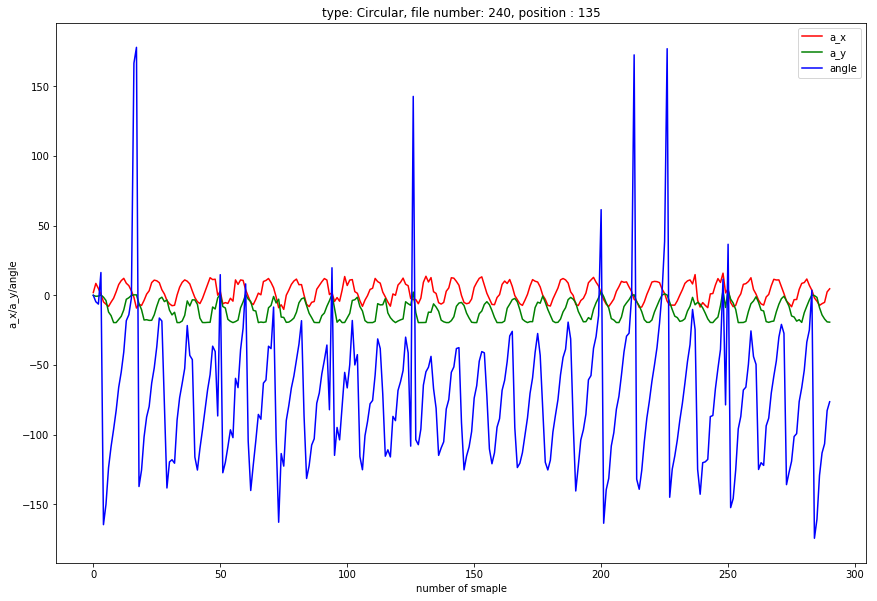

Are you happy with the graph? y/nn


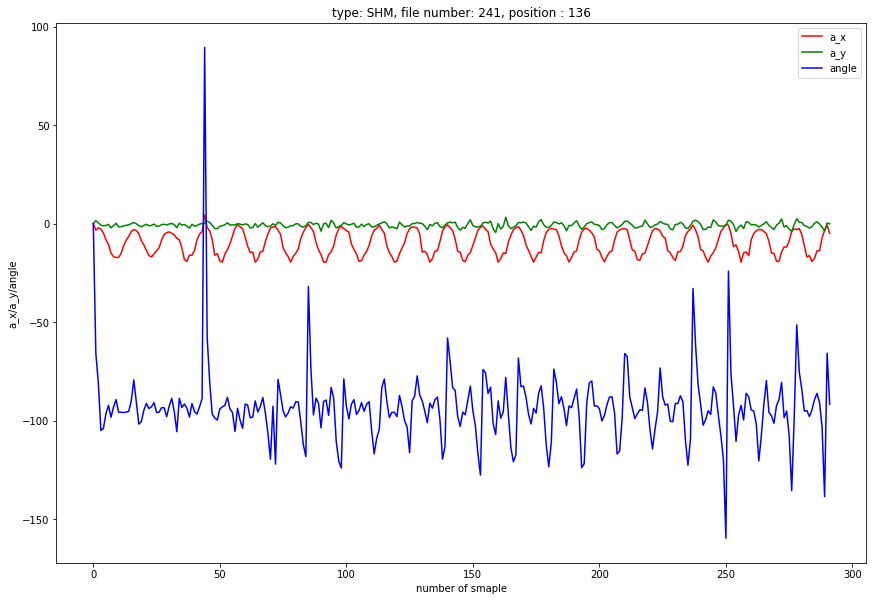

Are you happy with the graph? y/ny


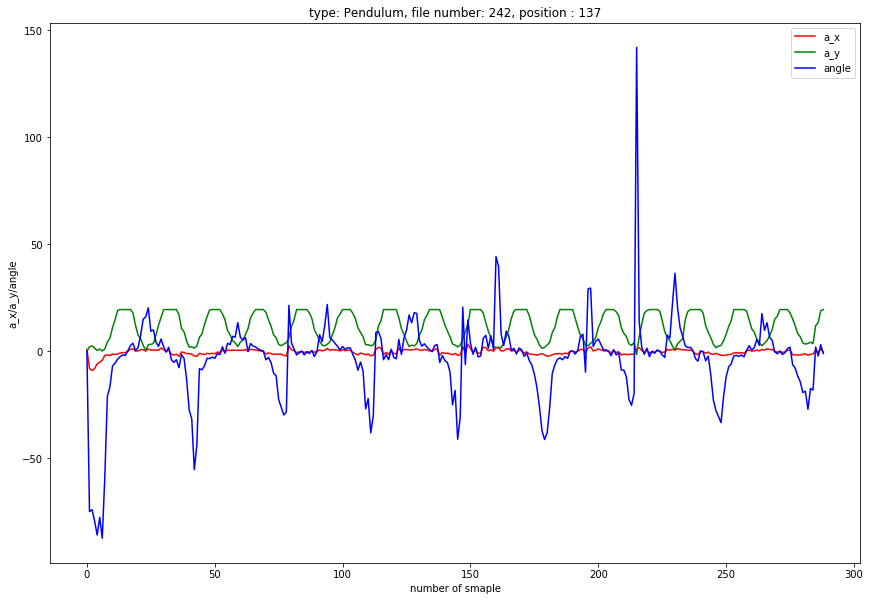

Are you happy with the graph? y/nn


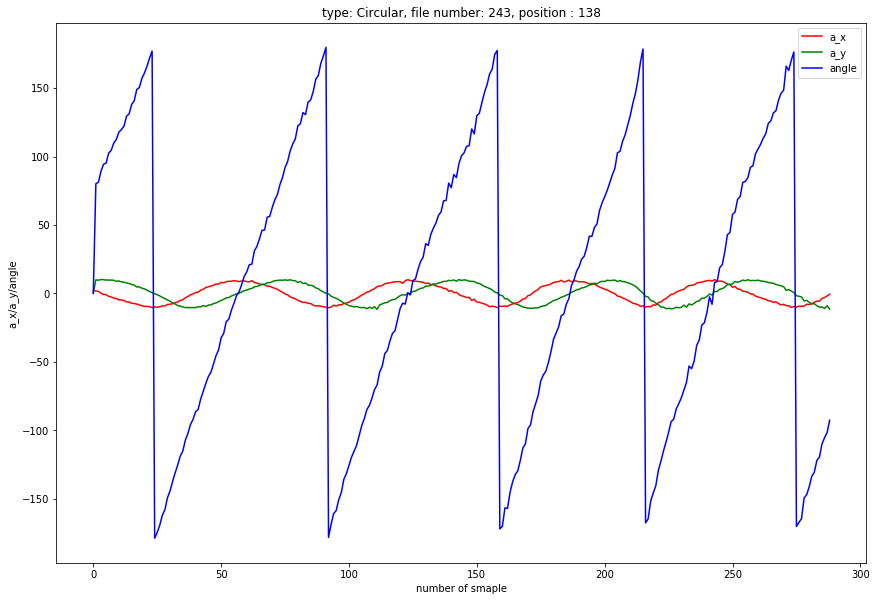

Are you happy with the graph? y/ny


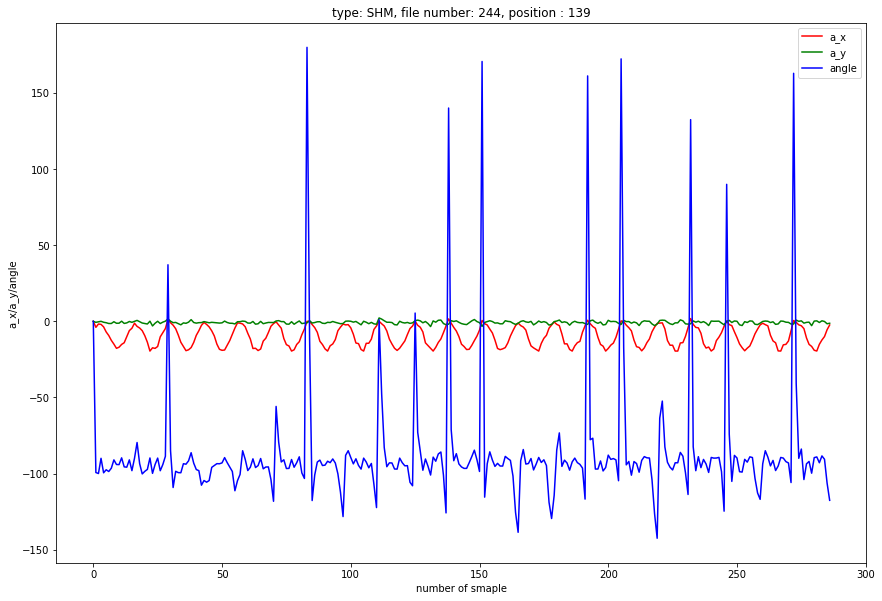

Are you happy with the graph? y/nn


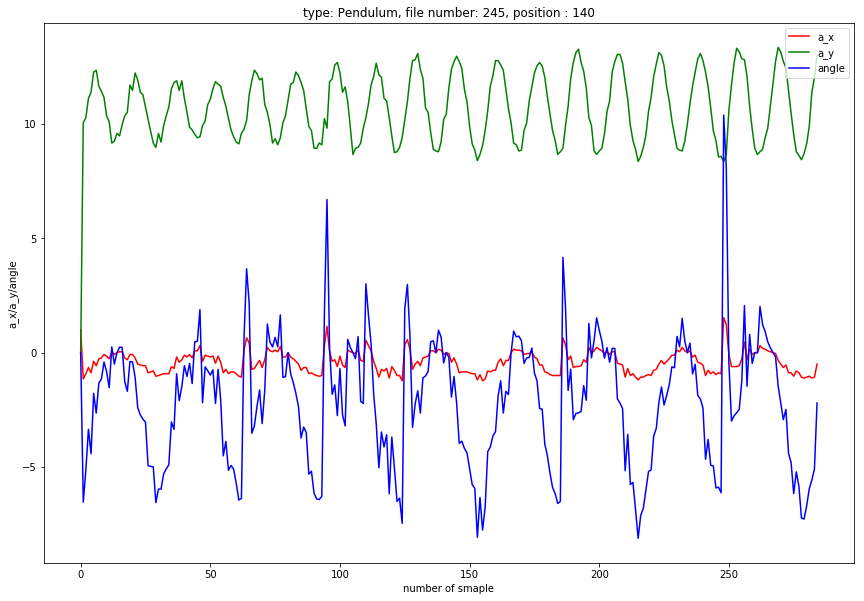

Are you happy with the graph? y/nn


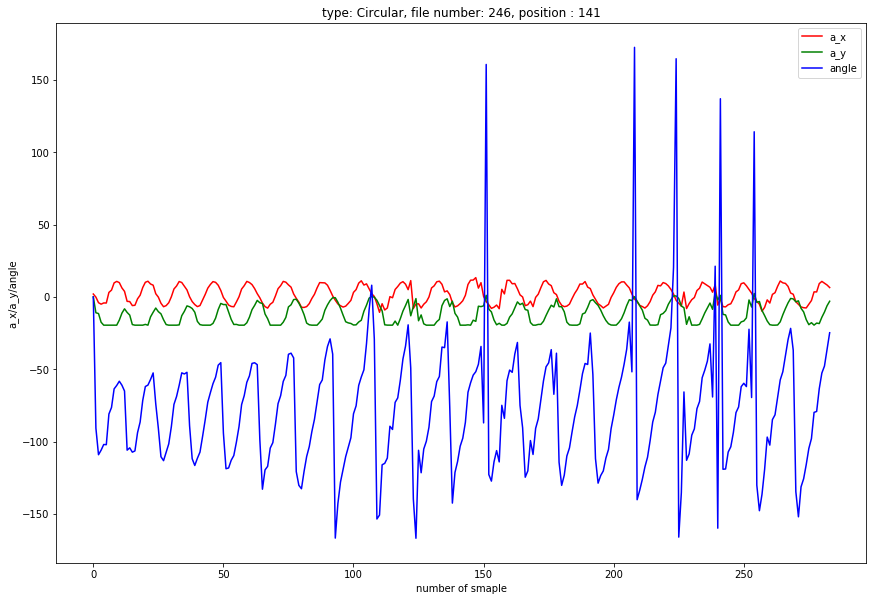

Are you happy with the graph? y/nn


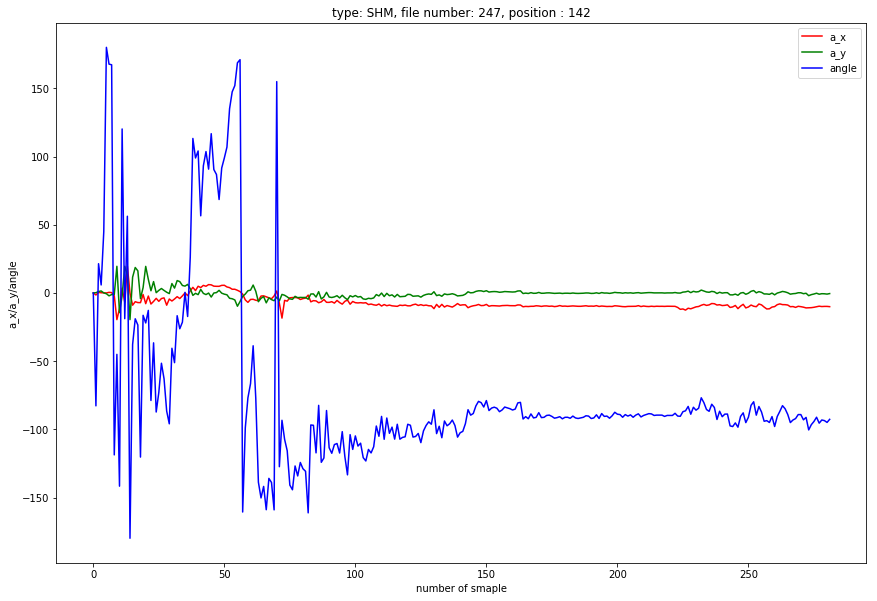

Are you happy with the graph? y/nn


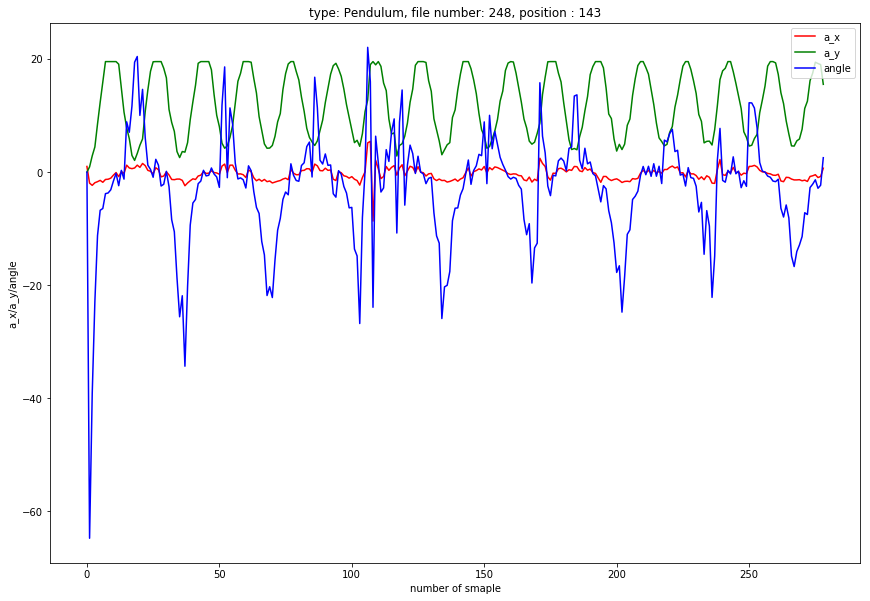

Are you happy with the graph? y/nn


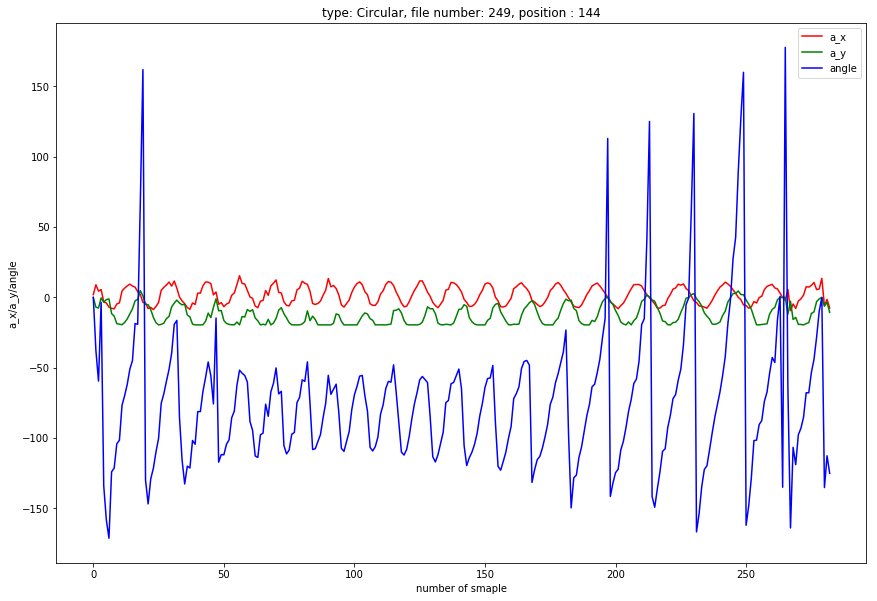

Are you happy with the graph? y/nn


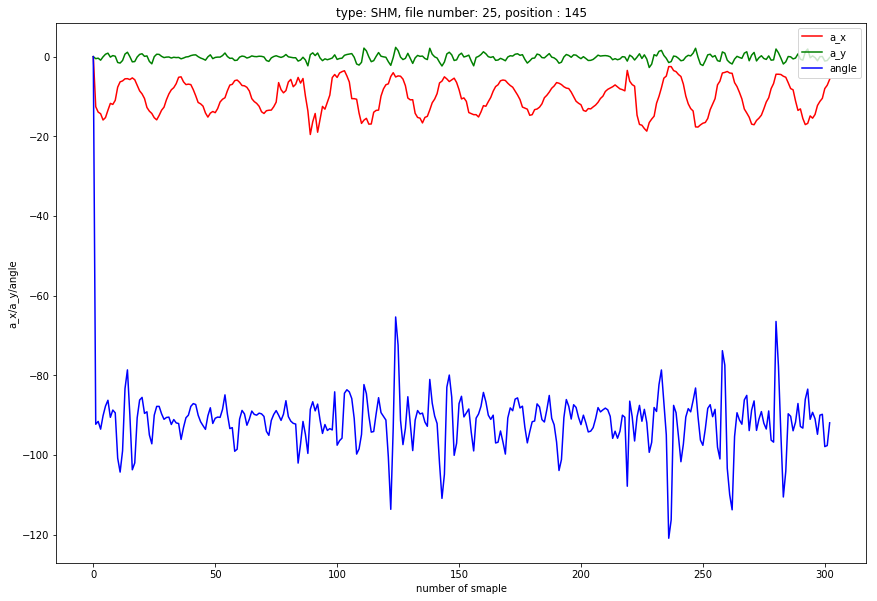

Are you happy with the graph? y/ny


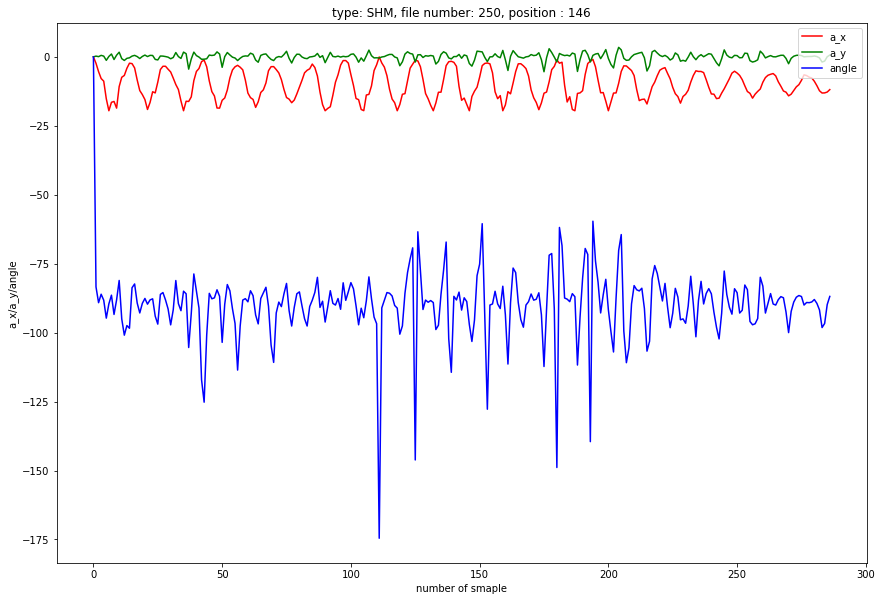

Are you happy with the graph? y/nn


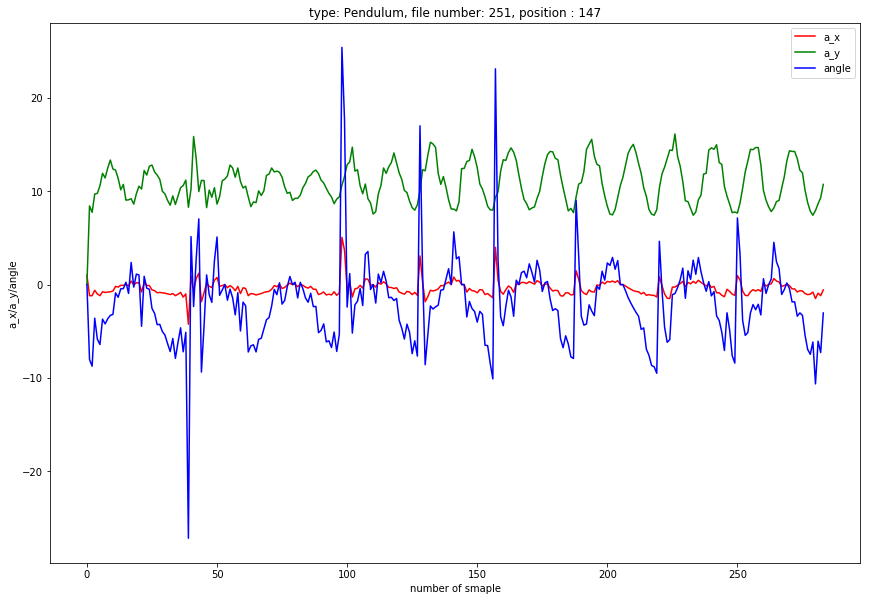

Are you happy with the graph? y/nn


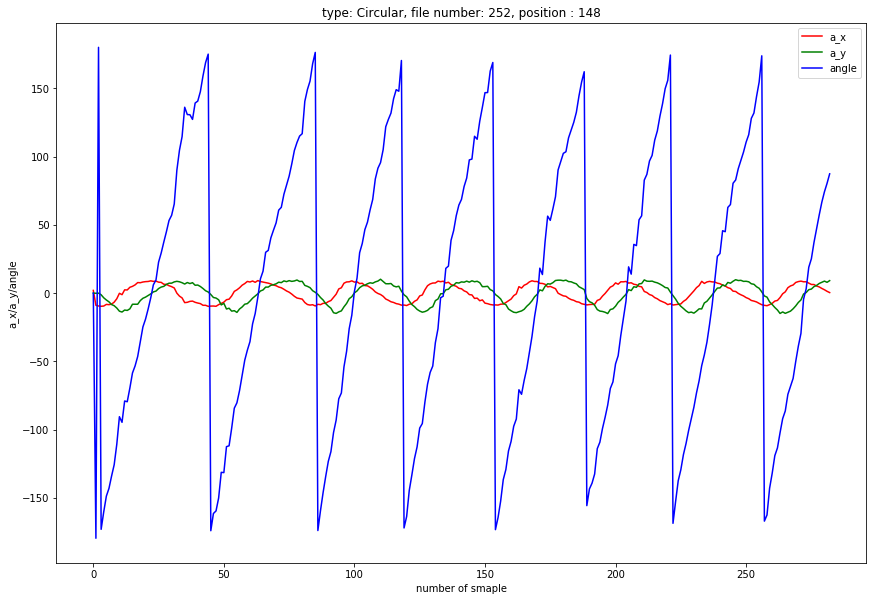

Are you happy with the graph? y/ny


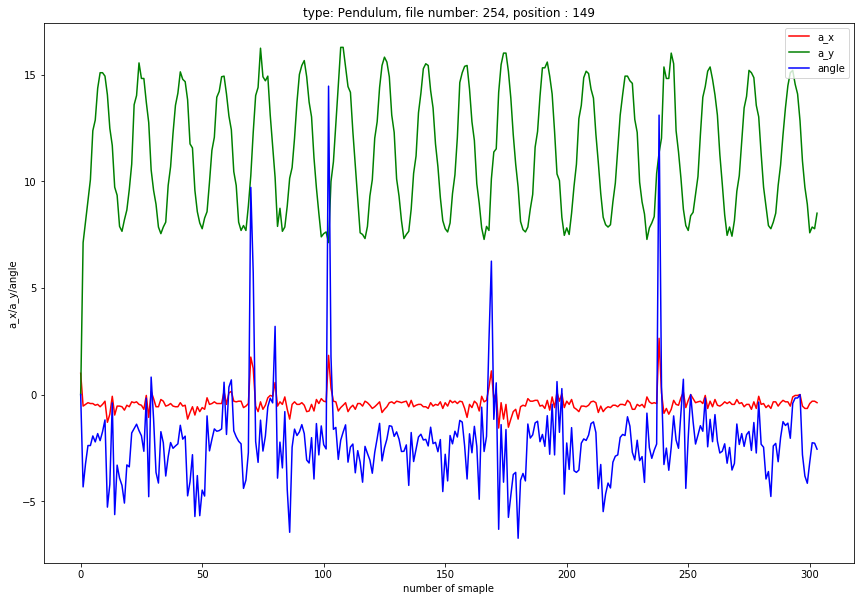

Are you happy with the graph? y/nn


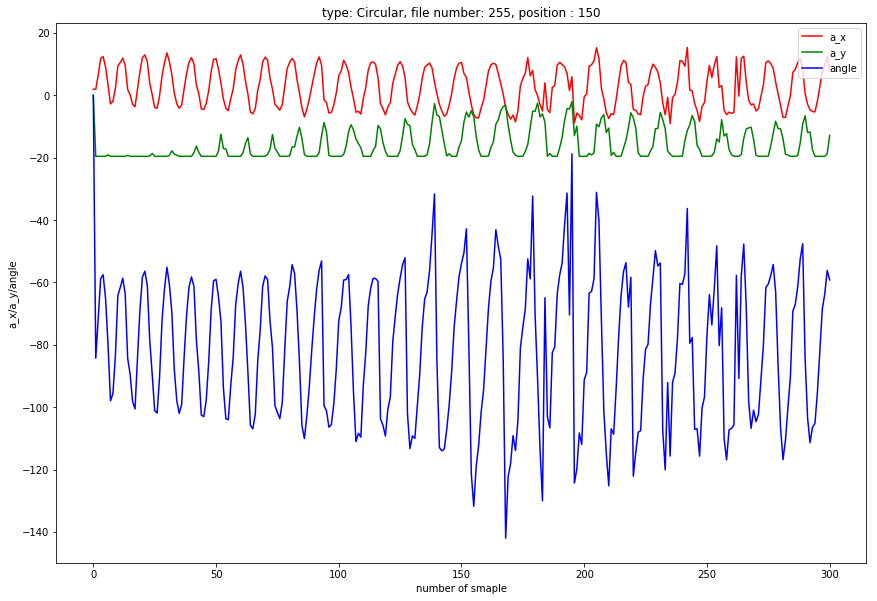

In [ ]:
# checking the files

#getting the list of saved data files
data_files = get_files('Data')

# Some of the files can be faulty and we have to stop checking them to fix the error.
#To not to start the checking from the first file again, let's ask the user where they stopped the process.
count_SHM = 0
count_pend = 0
count_circ = 0
position = input("What was the latest file you have checked?")
for i in range(int(position), len(data_files)):
    df = process_file(data_files[i])
    df = to_numeric(df)
    type_ = motion_type(df)
    if type_ == 'SHM':
        count_SHM +=1
    elif type_ == 'Pendulum':
        count_pend +=1
    else:
        count_circ +=1
    file_number = data_files[i].strip("C:\\Users\\at\\OneDrive - Blundell's School\\Scientific_personal\\Data Science\\My own projects\\ML_Microbit\\Data\\MLtest")
    file_number = file_number.strip(".txt")
    position = i
    plot_graph(df, type_, file_number, position)
    keep = input('Are you happy with the graph? y/n')
    if keep == 'n':
        os.remove(data_files[i])
        

print('We have {} files for SHM, {} files for pendulum, {} files for circular motion, \
      {} files altogether'.format(count_SHM, count_pend, count_circ, sum(count_SHM, count_pend, count_circ)))  